In [2]:
# Importar bibliotecas
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
from matplotlib.widgets import Slider
import numpy as np
import cv2 as cv
from scipy.optimize import curve_fit
from scipy.ndimage import median_filter
import h5py
import os

In [2]:
'''
Função para leitura de uma imagem (tipo raw) individual
fileName -  nome do arquivo
dimX, dimY - dimensão em pixels da imagem
_type - tipo de dado no arquivo, no XRMC float64
_offset - bloco de cabecalho do arquivo de imagem em bytes, no XRMC (60 bytes)
'''
def readRawXRMCImg(fileName, dimX, dimY, _type, _offset):
    img = np.fromfile(fileName, dtype=_type, count=dimX*dimY, offset=_offset)
    img = img.reshape((dimX, dimY))
    return img

In [51]:
def readHDF5Img(fileName, datapath, stepPrjs=1):
    if os.path.isfile(fileName):
        data  = np.array(h5py.File(fileName, 'r')[datapath][:], dtype=np.uint16)    

        data = data[:,0,:,:]

        if stepPrjs > 1:
            data = data[::stepPrjs,:,:]

        return data
    else:
        print("File not found - Error in hdf5 file reading")
        return None

In [3]:
'''
Função para leitura de um diretorio (ou subconjunto) de imagens de um diretorio contendo imagens de simulação
folderName - nome (path) do diretorio
fileNamePrefix - prefixo do nome do arquivo de imagem  
initImg - indice (grau) da imagem inicial, geralmente 0
finalImg - indice (grau) da imagem final, geralmente 359
step -  paso em grau entre as imagens, geralmente 1 
dimX, dimY - dimensão em pixels da imagem
_type - tipo de dado no arquivo, no XRMC float64
_offset - bloco de cabecalho do arquivo de imagem em bytes, no XRMC (60 bytes)
'''
def readRawXRMCFolder(folderName, fileNamePrefix, initImg, finalImg, step, dimX, dimY, _type, _offset):
    fileName = f'{folderName}/{fileNamePrefix}{initImg:04d}.dat'    
    #fileName = f'{folderName}/{fileNamePrefix}{initImg:04d}.raw'    
    imgs = readRawXRMCImg(fileName, dimX, dimY, _type, _offset)
    for i in range(initImg+step, finalImg, step):
        fileName = f'{folderName}/{fileNamePrefix}{i:04d}.dat'    
        #fileName = f'{folderName}/{fileNamePrefix}{i:04d}.raw'    
        img = readRawXRMCImg(fileName, dimX, dimY, _type, _offset)
        imgs = np.dstack((imgs, img))
    return imgs 

In [49]:
def readHDF5Folder(folderName, fileNamePrefix, datapath, iniIndex, lastIndex, stepPrjs=1):
    fileName = f'{folderName}/{fileNamePrefix}{iniIndex}.hdf5'      
    imgs = readHDF5Img(fileName, datapath, stepPrjs)    
    print(fileName, imgs.shape)  
    for i in range(iniIndex+1, lastIndex+1, 1):
        fileName = f'{folderName}/{fileNamePrefix}{i}.hdf5'
        img = readHDF5Img(fileName, datapath, stepPrjs)
        imgs = np.vstack((imgs, img))
        print(fileName, imgs.shape)  
    return imgs 

In [16]:
caracol = np.load(r"D:\TC_UESC\TC1_Caracol\sino_correted_align.npz")
caracol = caracol['sino']
print(caracol.shape, caracol.dtype, caracol.min(), caracol.max())
imgSrc = caracol

(200, 1200, 1000) float32 2.606973e-05 1.1515477


In [52]:
foldername = 'D:/DadosHBr/Ratocontrole'
prefix = 'rato_'
datapath = 'entry/data/data'

rato = readHDF5Folder(foldername, prefix, datapath, 0, 16, 2)

print(rato.shape)

D:/DadosHBr/Ratocontrole/rato_0.hdf5 (200, 256, 1536)
D:/DadosHBr/Ratocontrole/rato_1.hdf5 (400, 256, 1536)
D:/DadosHBr/Ratocontrole/rato_2.hdf5 (600, 256, 1536)
D:/DadosHBr/Ratocontrole/rato_3.hdf5 (800, 256, 1536)
D:/DadosHBr/Ratocontrole/rato_4.hdf5 (1000, 256, 1536)
D:/DadosHBr/Ratocontrole/rato_5.hdf5 (1200, 256, 1536)
D:/DadosHBr/Ratocontrole/rato_6.hdf5 (1400, 256, 1536)
D:/DadosHBr/Ratocontrole/rato_7.hdf5 (1600, 256, 1536)
D:/DadosHBr/Ratocontrole/rato_8.hdf5 (1800, 256, 1536)
D:/DadosHBr/Ratocontrole/rato_9.hdf5 (2000, 256, 1536)
D:/DadosHBr/Ratocontrole/rato_10.hdf5 (2200, 256, 1536)
D:/DadosHBr/Ratocontrole/rato_11.hdf5 (2400, 256, 1536)
D:/DadosHBr/Ratocontrole/rato_12.hdf5 (2600, 256, 1536)
D:/DadosHBr/Ratocontrole/rato_13.hdf5 (2800, 256, 1536)
D:/DadosHBr/Ratocontrole/rato_14.hdf5 (3000, 256, 1536)
D:/DadosHBr/Ratocontrole/rato_15.hdf5 (3200, 256, 1536)
D:/DadosHBr/Ratocontrole/rato_16.hdf5 (3400, 256, 1536)
(3400, 256, 1536)


In [53]:
imgSrc = rato.transpose(1,2,0)

In [5]:
print(imgSrc.shape)

(200, 1200, 1000)


In [29]:
filename = 'D:/DadosHBr/Ratocontrole/rato_1.hdf5'
datapath = 'entry/data/data'

img = readHDF5Img(filename, datapath, 4)
print(img.shape)



(100, 256, 1536)


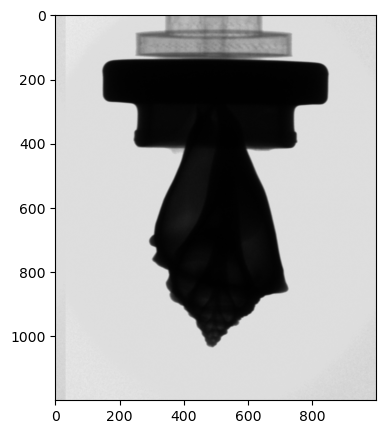

In [17]:
plt.rcParams["figure.figsize"]=5,5
fig = plt.figure()
ax = plt.axes()
ax.imshow(imgSrc[10, :,:], 'gray')

In [17]:
#folderName = 'D:/XRMC/HelicoidalSquareDetector/prjs_256'
folderName = 'C:/Users/dsdom/Dropbox/HAPI/XRMC/PerformanceTest_SizePrototype/Helical_8Turn_32L'
#imgSrc = readRawXRMCFolder(folderName, 'img_', 0, 40, 1, 256, 256, 'float64', 0)
imgSrc = readRawXRMCFolder(folderName, 'img_', 0, 3200, 1, 32, 1024, 'float64', 0)

In [18]:
flat = readRawXRMCImg('C:/Users/dsdom/Dropbox/HAPI/XRMC/PerformanceTest_SizePrototype/Helical_1Turn_32L/flat.dat', 32, 1024, 'float64', 0)
print(flat.shape)

(32, 1024)


In [19]:
for i in range(imgSrc.shape[2]):
    imgSrc[:, :, i] = imgSrc[:, :, i] / flat  # Normalize each image by flat field

In [18]:
print(imgSrc.shape)
print(imgSrc.shape[0], imgSrc.shape[1], imgSrc.shape[2])
minVal = imgSrc.min()
maxVal = imgSrc.max()
print(minVal, maxVal, imgSrc.mean())

(200, 1200, 1000)
200 1200 1000
2.606973e-05 1.1515477 0.6912661


In [21]:
imgSrc[imgSrc > 1] = 1

In [19]:
imgSrc = (((imgSrc-minVal)/(maxVal-minVal))*65535).astype("uint16")

print(imgSrc.min(), imgSrc.max(), imgSrc.mean())

0 65535 39339.47245246667


In [ ]:
for i in range(imgSrc.shape[0]):
    imgSrc[i, :, :] = imgSrc[i, ::-1, :]

    

In [23]:
imgSrc = imgSrc/65535

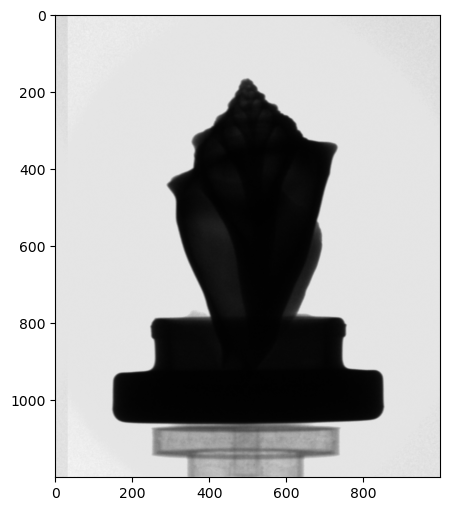

In [24]:
plt.rcParams["figure.figsize"]=8,6
fig = plt.figure()
ax = plt.axes()
ax.imshow(imgSrc[15, :,:], 'gray')

In [35]:
#Coloca a metade das projeções como frames

width = 1000 
height = 1200
framesNumber = (imgSrc.shape[0]//1)
time = 40
fps = framesNumber/time

fourcc = cv.VideoWriter_fourcc(*'mp4v')
video = cv.VideoWriter('test.mp4', fourcc, float(fps), (width, height))

#print(framesNumber)

for i in range(0, imgSrc.shape[0], 4):
    img = imgSrc[i, :, :]
    img = (img)*255
    img = img.astype(np.uint8)
    print(i, img.shape, img.max(), img.min(), img.mean(), np.isnan(img).sum())
    video.write(cv.cvtColor(img, cv.COLOR_GRAY2BGR))
    #video.write(img)

video.release() 

0 (1200, 1000) 246 0 156.06942916666668 0
4 (1200, 1000) 246 0 156.60815083333333 0
8 (1200, 1000) 254 0 157.037605 0
12 (1200, 1000) 255 0 157.13355083333335 0
16 (1200, 1000) 246 0 156.2201375 0
20 (1200, 1000) 246 0 155.1482625 0
24 (1200, 1000) 246 0 154.10630083333334 0
28 (1200, 1000) 246 0 153.12376166666667 0
32 (1200, 1000) 246 0 152.092645 0
36 (1200, 1000) 246 0 151.16801916666665 0
40 (1200, 1000) 246 0 150.39467583333334 0
44 (1200, 1000) 246 0 149.84010666666666 0
48 (1200, 1000) 254 0 149.57498833333332 0
52 (1200, 1000) 246 0 149.44015166666668 0
56 (1200, 1000) 245 0 149.63700416666666 0
60 (1200, 1000) 246 0 149.98271166666666 0
64 (1200, 1000) 246 0 150.5441825 0
68 (1200, 1000) 246 0 151.24953 0
72 (1200, 1000) 244 0 151.97682583333332 0
76 (1200, 1000) 246 0 152.667165 0
80 (1200, 1000) 248 0 153.30245 0
84 (1200, 1000) 245 0 153.82174083333334 0
88 (1200, 1000) 246 0 154.02499166666666 0
92 (1200, 1000) 246 0 154.114475 0
96 (1200, 1000) 246 0 154.36332083333335 0